In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from torchdiffeq import odeint
import matplotlib.animation as animation

In [18]:
class CellSystem(torch.nn.Module):
    def __init__(self, num_cells=3, num_factors=4):
        super().__init__()
        self.num_cells = num_cells  # Number of cells
        self.num_factors = num_factors  # Number of factors in each cell
        # Random coefficients for the factors of each cell
        # Coefficients matrix: (num_cells, num_factors) for each factor
        self.coefficients = torch.randn(num_cells, num_factors)  # Coefficients for each cell's factors
        
        # Interaction matrix for how factors influence each other (same for all cells)
        self.A = torch.rand(num_factors, num_factors)  # Interaction matrix

    def forward(self, t, state):
        # Compute the change in state based on the interaction matrix
        # Each cell's state is influenced by the interaction matrix and its own coefficients
        states = torch.matmul(state, self.A)  # Interactions between the factors
        
        # Now, apply the cell-specific coefficients to each cell's states
        for i in range(self.num_cells):
            states[i] *= self.coefficients[i]  # Apply cell-specific coefficients to the states
        
        return torch.tanh(states)

In [19]:
# Initialize the system
num_cells = 3  # Number of cells
num_factors = 4  # Number of factors in each cell
model = CellSystem(num_cells=num_cells, num_factors=num_factors)

# Initial state for each cell (random initial values for the factors)
initial_state = torch.rand(num_cells, num_factors)  # Random initial values for the factors in each cell

# Time points (0 to 10 seconds, 100 points for smoother simulation)
t = torch.linspace(0, 10, 100)

# Solve ODE
with torch.no_grad():
    states = odeint(model, initial_state, t)

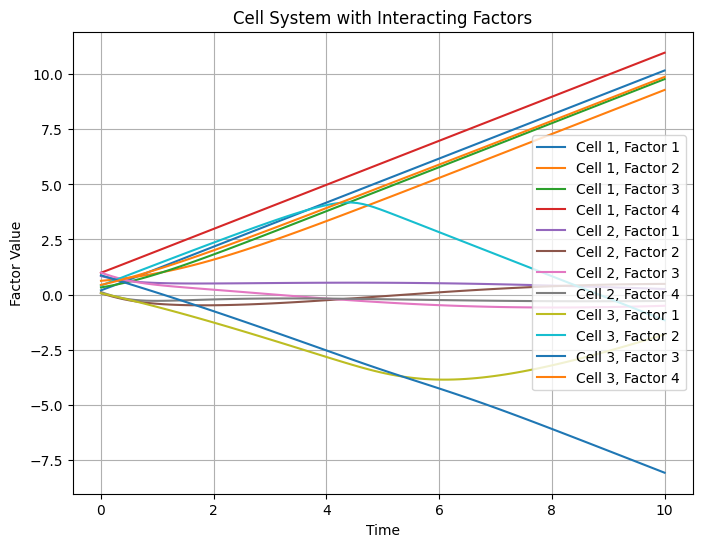

In [20]:
# Plot the results
plt.figure(figsize=(8, 6))

# Loop through each cell and plot its trajectory for each factor
for cell_id in range(num_cells):
    for factor_id in range(num_factors):
        plt.plot(t, states[:, cell_id, factor_id], label=f"Cell {cell_id+1}, Factor {factor_id+1}")

plt.xlabel("Time")
plt.ylabel("Factor Value")
plt.title("Cell System with Interacting Factors")
plt.legend()
plt.grid(True)
plt.show()